In [1]:
!pip install matplotlib
!pip install vega_datasets
!pip install --upgrade folium
!pip install sklearn

You should consider upgrading via the 'c:\users\katherine\appdata\local\programs\python\python37-32\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\katherine\appdata\local\programs\python\python37-32\python.exe -m pip install --upgrade pip' command.


Requirement already up-to-date: folium in c:\users\katherine\appdata\local\programs\python\python37-32\lib\site-packages (0.11.0)


You should consider upgrading via the 'c:\users\katherine\appdata\local\programs\python\python37-32\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\katherine\appdata\local\programs\python\python37-32\python.exe -m pip install --upgrade pip' command.


## 1 - Retrieving the latest dataset from source:

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import altair as alt
import numpy as np
from vega_datasets import data

data_url_counties = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
data_url_states = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
us_counties = pd.read_csv(data_url_counties, error_bad_lines=False)
display(us_counties.head())
display(us_counties.info())

us_states = pd.read_csv(data_url_states, error_bad_lines=False)
display(us_states.head())
display(us_states.info())

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270245 entries, 0 to 270244
Data columns (total 6 columns):
date      270245 non-null object
county    270245 non-null object
state     270245 non-null object
fips      267420 non-null float64
cases     270245 non-null int64
deaths    270245 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 12.4+ MB


None

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6339 entries, 0 to 6338
Data columns (total 5 columns):
date      6339 non-null object
state     6339 non-null object
fips      6339 non-null int64
cases     6339 non-null int64
deaths    6339 non-null int64
dtypes: int64(3), object(2)
memory usage: 247.7+ KB


None

## 2 - Get basic information of cases in each state on current day
We retrieve the latest date that the data includes, and display the distribution of cases for each state on the latest day, as well as the total number of cases on the latest day. We are only considering the 50 states, Washington DC, and Puerto Rico. 

In [2]:
from datetime import datetime, timedelta



#get the date range of the data
total_dates = us_states["date"].unique()
date_range = [total_dates[1],total_dates[len(total_dates)-1]]
print("Date range of data: " + str(date_range[0]) + " to " + str(date_range[1]))

#extract the latest data
latest_date = date_range[1]
latest_date_dt = datetime.strptime(latest_date, '%Y-%m-%d')
latest_cases = us_states[us_states["date"]==latest_date]
latest_cases = latest_cases[latest_cases.state != 'Guam']
latest_cases = latest_cases[latest_cases.state != 'Northern Mariana Islands']
latest_cases = latest_cases[latest_cases.state != 'Virgin Islands']
latest_cases = latest_cases[latest_cases.state != 'American Samoa']
latest_cases = latest_cases[latest_cases.state != 'Puerto Rico']

display(latest_cases)

#get the latest total cases
total_cases = latest_cases["cases"].sum()
print("Total cases on " + str(latest_date) + ": "+  str(total_cases))

latest_cases.shape

Date range of data: 2020-01-22 to 2020-06-25


,date,state,fips,cases,deaths
6284,2020-06-25,Alabama,1,33206,896
6285,2020-06-25,Alaska,2,971,10
6286,2020-06-25,Arizona,4,63297,1495
6287,2020-06-25,Arkansas,5,18062,240
6288,2020-06-25,California,6,201413,5810
6289,2020-06-25,Colorado,8,31463,1669
6290,2020-06-25,Connecticut,9,45994,4298
6291,2020-06-25,Delaware,10,10980,507
6292,2020-06-25,District of Columbia,11,10159,543
6293,2020-06-25,Florida,12,114010,3326


Total cases on 2020-06-25: 2427095


(51, 5)

## 3 - Basic Descriptive Statistics
We look at the range, mean, and standard deviation in number of cases and deaths on March 14, 2020, compared to April 8, 2020. We chose March 14, 2020, because that is the first date on which all 52 locations reported at least one case. Below are the distributions of values for these dates. 

Stats for March 14, 2020

Cases:

Min: 1 (Alaska)
Max: 610 (New York)
Mean: 55.73076923076923
Std Dev: 125.37334291276665

Deaths:

Min: 0 (Alabama)
Max: 40 (Washington)
Mean: 1.1538461538461537
Std Dev: 5.570878817511352



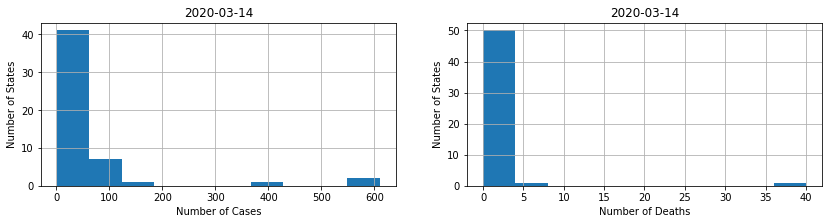

In [4]:
#data for first_date
first_date = "2020-03-14"
first_date_cases = us_states[us_states["date"]==first_date]
first_date_cases = first_date_cases[first_date_cases.state != 'Guam']
first_date_cases = first_date_cases[first_date_cases.state != 'Northern Mariana Islands']
first_date_cases = first_date_cases[first_date_cases.state != 'Virgins Islands']

#min, max, mean, and std dev for first_date cases
first_max_c = first_date_cases['cases'].max()
first_max_idx_c = first_date_cases['cases'].idxmax()
first_max_state_c = first_date_cases['state'][first_max_idx_c]

first_min_c = first_date_cases['cases'].min()
first_min_idx_c = first_date_cases['cases'].idxmin()
first_min_state_c = first_date_cases['state'][first_min_idx_c]

first_mean_c = first_date_cases['cases'].mean()
first_std_c = first_date_cases['cases'].std()

print("Stats for March 14, 2020\n")

#print stats for first_date cases
print("Cases:\n")
print("Min: " + str(first_min_c) + " (" + first_min_state_c + ")")
print("Max: " + str(first_max_c)+ " (" + first_max_state_c + ")")
print("Mean: " + str(first_mean_c))
print("Std Dev: " + str(first_std_c) + "\n")

#min, max, mean, and std dev for first_date deaths
first_max_d = first_date_cases['deaths'].max()
first_max_idx_d = first_date_cases['deaths'].idxmax()
first_max_state_d = first_date_cases['state'][first_max_idx_d]

first_min_d = first_date_cases['deaths'].min()
first_min_idx_d = first_date_cases['deaths'].idxmin()
first_min_state_d = first_date_cases['state'][first_min_idx_d]

first_mean_d = first_date_cases['deaths'].mean()
first_std_d = first_date_cases['deaths'].std()

#print stats for first_date deaths
print("Deaths:\n")
print("Min: " + str(first_min_d) + " (" + first_min_state_d + ")")
print("Max: " + str(first_max_d)+ " (" + first_max_state_d + ")")
print("Mean: " + str(first_mean_d))
print("Std Dev: " + str(first_std_d) + "\n")

#plot stats for first_date
first_date_f = plt.figure(figsize=(14,3))

first_ax_c = first_date_f.add_subplot(121)
first_ax_d = first_date_f.add_subplot(122)

first_ax_c.set_title(first_date)
first_ax_c.set_xlabel("Number of Cases")
first_ax_c.set_ylabel("Number of States")

first_ax_d.set_title(first_date)
first_ax_d.set_xlabel("Number of Deaths")
first_ax_d.set_ylabel("Number of States")

first_date_cases["cases"].hist(bins=10, ax=first_ax_c)
first_date_cases["deaths"].hist(bins=10, ax=first_ax_d)
plt.show()

Stats for April 8, 2020

Cases:

Min: 224 (Alaska)
Max: 151271 (New York)
Mean: 8283.615384615385
Std Dev: 21807.601572822594

Deaths:

Min: 0 (Wyoming)
Max: 8138 (New York)
Mean: 321.03846153846155
Std Dev: 1137.9192218055066


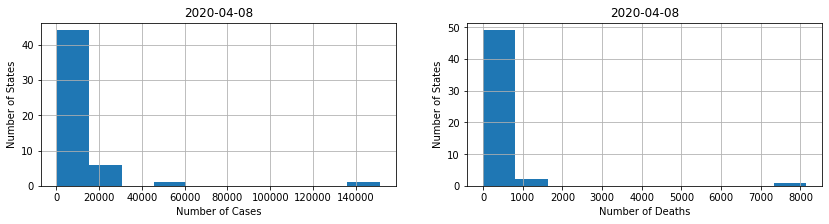

In [5]:
#data for last_date
last_date = "2020-04-08"
last_date_cases = us_states[us_states["date"]==last_date]
last_date_cases = last_date_cases[last_date_cases.state != 'Guam']
last_date_cases = last_date_cases[last_date_cases.state != 'Northern Mariana Islands']
last_date_cases = last_date_cases[last_date_cases.state != 'Virgin Islands']

#min, max, mean, and std dev for first_date cases
last_max_c = last_date_cases['cases'].max()
last_max_idx_c = last_date_cases['cases'].idxmax()
last_max_state_c = last_date_cases['state'][last_max_idx_c]

last_min_c = last_date_cases['cases'].min()
last_min_idx_c = last_date_cases['cases'].idxmin()
last_min_state_c = last_date_cases['state'][last_min_idx_c]

last_mean_c = last_date_cases['cases'].mean()
last_std_c = last_date_cases['cases'].std()

#print stats for last_date cases
print("Stats for April 8, 2020\n")
print("Cases:\n")
print("Min: " + str(last_min_c) + " (" + last_min_state_c + ")")
print("Max: " + str(last_max_c)+ " (" + last_max_state_c + ")")
print("Mean: " + str(last_mean_c))
print("Std Dev: " + str(last_std_c) + "\n")

#min, max, mean, and std dev for last_date deaths
last_max_d = last_date_cases['deaths'].max()
last_max_idx_d = last_date_cases['deaths'].idxmax()
last_max_state_d = last_date_cases['state'][last_max_idx_d]

last_min_d = last_date_cases['deaths'].min()
last_min_idx_d = last_date_cases['deaths'].idxmin()
last_min_state_d = last_date_cases['state'][last_min_idx_d]

last_mean_d = last_date_cases['deaths'].mean()
last_std_d = last_date_cases['deaths'].std()

#print stats for last_date deaths
print("Deaths:\n")
print("Min: " + str(last_min_d) + " (" + last_min_state_d + ")")
print("Max: " + str(last_max_d)+ " (" + last_max_state_d + ")")
print("Mean: " + str(last_mean_d))
print("Std Dev: " + str(last_std_d))

#plot stats for last_date 
last_date_f = plt.figure(figsize=(14,3))

last_ax_c = last_date_f.add_subplot(121)
last_ax_d = last_date_f.add_subplot(122)

last_ax_c.set_title(last_date)
last_ax_c.set_xlabel("Number of Cases")
last_ax_c.set_ylabel("Number of States")

last_ax_d.set_title(last_date)
last_ax_d.set_xlabel("Number of Deaths")
last_ax_d.set_ylabel("Number of States")

last_date_cases["cases"].hist(bins=10, ax=last_ax_c)
last_date_cases["deaths"].hist(bins=10, ax=last_ax_d)
plt.show()

## 4 - Examining the trend of when states began reporting cases in the US

Text(0, 0.5, 'Number of States')

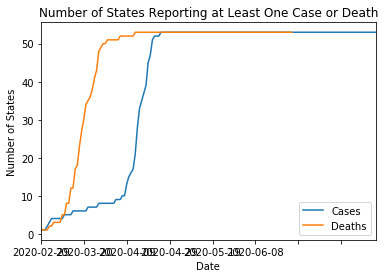

In [6]:
states_only = us_states[us_states.state != 'Guam']
states_only = states_only[states_only.state != 'Northern Mariana Islands']
states_only = states_only[states_only.state != 'Virgins Islands']

first_case_series = states_only.groupby('date').size()
first_case_series.plot(kind="line", label="Cases", legend=True, title="Number of States Reporting at Least One Case or Death")

states_only = states_only[states_only.deaths > 0]
first_death_series = states_only.groupby('date').size()
first_death_series.plot(kind="line", label="Deaths", legend="True")

plt.xlabel('Date')
plt.ylabel('Number of States')

## 5 - Examining case growth curves in "hot spot" states
We defined 'hot spot' states as those who make up more than 4% of the country's cases on the latest date recorded


In [7]:
us_states['date'] = pd.to_datetime(us_states['date'], format="%Y/%m/%d")

recent_cases = us_states[us_states['date']>"2020-03-1"]
hotspot_threshold=total_cases*.04

states_slow_growth = recent_cases[recent_cases['date']==latest_date]
states_slow_growth = states_slow_growth[states_slow_growth['cases']<hotspot_threshold]
states_slow_growth= states_slow_growth["state"]
recent_cases_hot_spot = recent_cases[~recent_cases.state.isin(states_slow_growth)]

scales = alt.selection_interval(bind='scales')
highlight = alt.selection(type='single', on='mouseover', fields=['state'], nearest=True)

base = alt.Chart(recent_cases_hot_spot).mark_line(point=True).encode(
    y=alt.Y('cases:Q', axis=alt.Axis(title='Total Cases')),
#     x='date:T',
    x=alt.X('date:T', axis=alt.Axis(format='%b %d', title='Date')),
#     y='cases:Q',
    color='state:N',
    tooltip=['state', 'cases', 'date']
)


points = base.mark_circle().encode(
    opacity=alt.value(1)
).add_selection(
    highlight
).properties(
    width=600,
    title='Total cases in hot spot states growth curve'
)


lines = base.mark_line().encode(
    size=alt.condition(~highlight, alt.value(1.25), alt.value(3))
)

display(points + lines)


alt.LayerChart(...)

## 6 - Examining percentage of cases compared to all states
The below chart maps which states have the majority of cases at a given date. We can see how Washington and California originally had majority of cases in the U.S., and how quickly New York took over, and continues to make up a large percentage of cases in the U.S.

In [8]:
chart = alt.Chart(recent_cases).mark_area().encode(
    x=alt.X('date:T', axis=alt.Axis(format='%b %d', title='Date')),
    y=alt.Y('cases:Q', stack="normalize", axis=alt.Axis(format='%', title='Percent of Total Cases')), 
#     x="date:T",
#     y=alt.Y("cases:Q", stack="normalize"),
    tooltip=['state', 'cases', 'date'],
    color= alt.Color('state:N', scale=alt.Scale(scheme='category20b'))

).properties(
    width=700,
    height=550,
    title="Distribution of cases among all states"
)

display(chart)

MaxRowsError: The number of rows in your dataset is greater than the maximum allowed (5000). For information on how to plot larger datasets in Altair, see the documentation

alt.Chart(...)

## 7 - Examining cases in New Jersey
We will take a look at how cases are distributed by county in New Jersey.

The map below shows an interesting distrubution of cases in the sense that the more north-east the county is, the higher the number of cases. This could be attributed to the fact that north Jersey is very densely populated, as well as its proximity to New York City.

TODO eventually:
https://towardsdatascience.com/how-to-build-a-time-series-dashboard-in-python-with-panel-altair-and-a-jupyter-notebook-c0ed40f02289

https://nextjournal.com/sdanisch/data-types-graphical-marks-and-visual-encoding-channels

In [9]:
counties = alt.topo_feature(data.us_10m.url, 'counties')
# airports = data.airports.url


nj_county_coord = pd.read_csv("nj_county_coordinates.csv", error_bad_lines=False)
nj_county_coord=nj_county_coord.set_index('county')


jersey_cases = us_counties.loc[(us_counties['date']==latest_date) & (us_counties['state']=='New Jersey') ]
jersey_cases= jersey_cases.set_index('county')


jersey_cases['lat']= nj_county_coord['lat']
jersey_cases['long']= nj_county_coord['long']
jersey_cases=jersey_cases.drop(['Unknown'])
jersey_cases=jersey_cases.reset_index()
# display(jersey_cases)


map_jersey =(
    alt.Chart(counties).mark_geoshape(
        fill='#fffafc',
        stroke='darkgray'
    ).transform_calculate(state_id = "(datum.id / 1000)|0")
    .transform_filter((alt.datum.state_id)==34)
).properties(
    width=800,
    height=600
).project('albersUsa')


# county positions on background
points = alt.Chart(jersey_cases).mark_point(filled=True, size=200).encode(
    longitude='long:Q',
    latitude='lat:Q',
    size=alt.Size('cases:Q', title='Number of Cases'),
    color=alt.Color('cases:Q', scale=alt.Scale(scheme='yelloworangered')),
    tooltip=['cases:N','county:N']
).properties(
    title='Cases in NJ'
)
# .transform_filter((datum.symbol == ticker) # this ties in the filter 
# .add_selection(select_date).transform_filter(select_date)

map_jersey + points


alt.LayerChart(...)

## 8 - Heatmap of cases in America

In [10]:
import folium
import folium.plugins # The Folium Javascript Map Library

USA_COORDINATES = (39.8283, -98.5795)
usa_map = folium.Map(location=USA_COORDINATES,zoom_start=3)
state_geo = 'us-states.json'
bins = list(latest_cases['cases'].quantile([0, 0.25, 0.5, 0.75, 1]))

folium.Choropleth(
    geo_data=state_geo,
    data=latest_cases,
    columns=['state', 'cases'],
    key_on='feature.properties.name',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.5,
    bins=bins,
    legend_name='Number of COVID-19 Cases' 
).add_to(usa_map)

folium.LayerControl().add_to(usa_map)

usa_map


### 8.1 - Excluding New York
New York has been aggressively testing and therefore has 67,180 more cases than the state with the second highest number of cases. Let's disregard New York to get a better look at how the other states compare. 

In [11]:
#Find NY row
indexNames = latest_cases[latest_cases['state'] == 'New York' ].index
 
# Delete this row from dataFrame
data_minus_NY = latest_cases.drop(indexNames)

bins_minus_NY = list(data_minus_NY['cases'].quantile([0, 0.25, 0.5, 0.75, 1]))

no_ny_map = folium.Map(location=USA_COORDINATES,zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    data=data_minus_NY,
    columns=['state', 'cases'],
    key_on='feature.properties.name',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.5,
    #bins=bins_minus_NY,
    legend_name='Number of COVID-19 Cases' 
).add_to(no_ny_map)

folium.LayerControl().add_to(no_ny_map)

no_ny_map


## 9 - Heatmap of deaths in America
Now we'll plot deaths.

In [12]:
usa_death_map = folium.Map(location=USA_COORDINATES,zoom_start=3)
death_bins = list(latest_cases['deaths'].quantile([0, 0.25, 0.5, 0.75, 1]))

folium.Choropleth(
    geo_data=state_geo,
    data=latest_cases,
    columns=['state', 'deaths'],
    key_on='feature.properties.name',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.5,
    bins=death_bins,
    legend_name='Number of COVID-19 Deaths' 
).add_to(usa_death_map)

folium.LayerControl().add_to(usa_death_map)

usa_death_map

### 9.1 Excluding New York again
Let's remove NY again, which currently has the worst outbreak of COVID-19.

In [13]:
no_ny_death_map = folium.Map(location=USA_COORDINATES,zoom_start=3)
no_ny_death_bins = list(data_minus_NY['deaths'].quantile([0, 0.25, 0.5, 0.75, 1]))

folium.Choropleth(
    geo_data=state_geo,
    data=data_minus_NY,
    columns=['state', 'deaths'],
    key_on='feature.properties.name',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Number of COVID-19 Deaths' 
).add_to(no_ny_death_map)

folium.LayerControl().add_to(no_ny_death_map)

no_ny_death_map

Note the difference between putting the values into 6 evenly spaced bins versus putting them into bins based on quantiles. Because states like NY and NJ have such high relative case values (and have more deaths in general because the outbreak is so bad there), it's hard to pick bins that make both the visualization (the actual map) AND the legend valuable.

## 10 - Days since first reported case for each state
We will now look at how each states' cases have grown since the first reported case. The following chart shows a few outliers in the data, visualizing how fast New York and New Jersey spiked in cases despite only reporting their first cases 39 and 36 days ago, respectively. On the other hand, Washington was the first to report a case in the country, but only has a small fraction of the cases that New York and New Jersey do. This shows that Washington and other early reporters of COVID-19 cases may have effectively slowed the spread of the virus

In [15]:
states = us_states["state"].unique()
states = np.delete(states,[50,51,52,54,55]) #delete non-us states
column_names = ["state", "first_case_date","days_since_first_case"]
first_case_dates_by_state = pd.DataFrame(columns = column_names)


for state in states:
    state_data = us_states[us_states["state"]==state]
    min_date=min(state_data["date"])
#     min_date_dt = datetime.strptime(min_date, '%Y-%m-%d')
    days_since_first_case=(latest_date_dt-min_date).days
    first_case_dates_by_state = first_case_dates_by_state.append({'state' : state , 'first_case_date' : min_date, 'days_since_first_case': days_since_first_case},
                                                                 ignore_index=True)
    
days_since_first_case=first_case_dates_by_state.set_index('state')

latest_cases_idk=latest_cases.set_index('state')

days_since_first_case['latest_cases']=latest_cases_idk['cases']
days_since_first_case=days_since_first_case.reset_index()
# display(days_since_first_case)

alt.Chart(days_since_first_case).mark_circle().encode(
    alt.X('days_since_first_case:Q', scale=alt.Scale(zero=False), axis=alt.Axis(title='Days since first case')),
    alt.Y('latest_cases:Q', scale=alt.Scale(zero=False), axis=alt.Axis(title='Latest cases')),
    color=alt.Color('latest_cases:Q', scale=alt.Scale(scheme='goldgreen')),
    size="8:N",
    tooltip=['state:N', 'latest_cases:Q', 'days_since_first_case']
).properties(
    width=800,
    height=300,
    title="Days since first case vs total cases on " + latest_date
)




/Users/annagodin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  


alt.Chart(...)

## 11 - Graph of daily new cases in New Jersey
Below we plot a graph that shows the increase in cases per day. 
There is a lot of talk on the news about "flattening the curve", however in the daily briefings that Governor Murphy holds, he only talks about developments from the overnight, and rarely shows the actual data plotted as a bar chart. The below chart actually visualizes the said curve that everyone is talking about. And we can see that it is, in fact, flattening

In [16]:
jersey_cases_full=us_states[us_states.state=="New Jersey"]
jersey_cases_county_full=us_counties[us_counties["state"]=="New Jersey"]

jersey_cases=jersey_cases_full.drop('state', axis=1)
jersey_cases=jersey_cases.drop('fips', axis=1)

first_case_date=jersey_cases.iloc[0].date
date_object=first_case_date
# date_object = datetime.strptime(first_case_date, '%Y-%m-%d')
date_object = date_object - timedelta(days=1)
time_string = date_object.strftime('%Y-%m-%d')

jersey_cases.loc[-1] = [time_string, 0, 0]  # adding a row
jersey_cases.index = jersey_cases.index + 1  # shifting index
jersey_cases = jersey_cases.sort_index()  # sorting by index
    
jersey_cases=jersey_cases.set_index('date')


daily_new_cases = jersey_cases.diff()
daily_new_cases=daily_new_cases.reset_index()
daily_new_cases=daily_new_cases.drop(0, axis=0)
daily_new_cases = daily_new_cases.astype({"cases": int, "deaths": int})
daily_new_cases=daily_new_cases.rename(columns={'cases': 'new_cases', 'deaths': 'new_deaths'})


# display(daily_new_cases)


max_daily_increase = daily_new_cases['new_cases'].max()
# display(max_daily_increase)

chart = alt.Chart(daily_new_cases).mark_bar().encode(
    y=alt.Y('new_cases:Q', axis=alt.Axis(title='New Cases')),
    x=alt.X('date:T', axis=alt.Axis(format='%b %d', title='Date')),
    # The highlight will be set on the result of a conditional statement
    color=alt.condition(
        alt.datum.new_cases == max_daily_increase,
        alt.value('red'),    
        alt.value('steelblue')  
    ),
    tooltip=['date:T','new_cases']

).properties(
    width=800,
    title="Daily new cases for New Jersey"
)

    
display(chart)

alt.Chart(...)

## 12 - Graph of daily new deaths in New Jersey

In [15]:

max_daily_increase = daily_new_cases['new_deaths'].max()
# display(max_daily_increase)

chart = alt.Chart(daily_new_cases).mark_bar().encode(
    y=alt.Y('new_deaths:Q', axis=alt.Axis(title='New Deaths')),
    x=alt.X('date:T', axis=alt.Axis(format='%b %d', title='Date')),
    # The highlight will be set on the result of a conditional statement
    color=alt.condition(
        alt.datum.new_deaths == max_daily_increase,
        alt.value('red'),    
        alt.value('steelblue')  
    ),
    tooltip=['date:T','new_deaths']

).properties(
    width=800,
    title="Daily new deaths for New Jersey"
)

    
display(chart)

alt.Chart(...)

## 13 - Machine Learning
In this section, we aim to analyze some factors that may cause some areas to have higher case/death counts than others. The main variables that we introduce are population size and population density, to see if it has any effect on case/death counts. 

### 13.1 - Create dataframe of cases and population by county

In [16]:
#load census county data, might have to figure out how to get this online so we don't have to submit the data when we submit the project??
census_data_filename = 'state_pop_data/co-est2019-alldata.csv'

census_counties = pd.read_csv(census_data_filename, error_bad_lines=False, encoding='latin-1')
census_counties = census_counties[['STATE','COUNTY','POPESTIMATE2019']]

#removing state entries (aka entries where the county is 0)
census_counties = census_counties[census_counties['COUNTY']!=0]

#functions to get fips code
def format_state_fips(state_fips):
    if state_fips > 0 and state_fips < 10:
        return "0" + str(state_fips)
    else:
        return str(state_fips)
    
def format_county_fips(county_fips):
    if county_fips > 0 and county_fips < 10:
        return "00" + str(county_fips)
    elif county_fips > 9 and county_fips < 100:
        return "0" + str(county_fips)
    else: 
        return str(county_fips)

def get_fips(state_fips, county_fips):
    return int(format_state_fips(state_fips) + format_county_fips(county_fips))

# using apply function to create a new columnS
census_counties['fips'] = census_counties.apply(lambda row: get_fips(row.STATE, row.COUNTY), axis = 1)

# display(census_counties)

land_area_file_name = "land_area_by_county.csv"
land_area_by_county = pd.read_csv(land_area_file_name,error_bad_lines=False)
land_area_by_county=land_area_by_county[['Areaname','STCOU','LND010190D']]
land_area_by_county=land_area_by_county.rename(columns={'Areaname': 'area_name', 'STCOU': 'fips', 'LND010190D' : 'land_area'})
# display(land_area_by_county)

combined = pd.merge(census_counties, land_area_by_county, on='fips')
combined = combined.rename(columns={'POPESTIMATE2019': 'pop_estimate_2019', 'STATE': 'state', 'COUNTY': 'county'})
combined['pop_density'] = combined['pop_estimate_2019']/combined['land_area']
# display(combined[combined['fips']==48301])


# temp contains county covid data, population data, and pop_density
temp = pd.merge(left=us_counties, right=combined[['fips','pop_estimate_2019','land_area','pop_density']])

display(temp)

,date,county,state,fips,cases,deaths,pop_estimate_2019,land_area,pop_density
0,2020-01-21,Snohomish,Washington,53061.0,1,0,822083,2196.53,374.264408
1,2020-01-22,Snohomish,Washington,53061.0,1,0,822083,2196.53,374.264408
2,2020-01-23,Snohomish,Washington,53061.0,1,0,822083,2196.53,374.264408
3,2020-01-24,Snohomish,Washington,53061.0,1,0,822083,2196.53,374.264408
4,2020-01-25,Snohomish,Washington,53061.0,1,0,822083,2196.53,374.264408
...,...,...,...,...,...,...,...,...,...
210269,2020-06-05,Real,Texas,48385.0,1,0,3452,700.09,4.930795
210270,2020-06-06,Real,Texas,48385.0,1,0,3452,700.09,4.930795
210271,2020-06-05,Throckmorton,Texas,48447.0,1,0,1501,915.54,1.639470
210272,2020-06-06,LaMoure,North Dakota,38045.0,1,0,4046,1150.86,3.515632


### 13.2 - Add days since first case to dataframe

In [17]:
counties = temp.groupby(["fips"])
column_names = ["fips", "first_case_date","days_since_first_case"]
first_case_dates_by_county = pd.DataFrame(columns = column_names)

temp['first_case_date'] = counties['date'].transform('min')

# temp['days_since_first_case'] = temp['first_case_date'].apply(lambda x: (datetime.date(datetime.now()) - datetime.strptime(x, '%Y-%m-%d').date()).days)

temp.first_case_date = pd.to_datetime(temp.first_case_date)
temp.date = pd.to_datetime(temp.date)
temp['days_since_first_case'] = (temp.date - temp.first_case_date)/np.timedelta64(1,'D')
temp['days_since_first_case'] = temp['days_since_first_case'].astype(np.int64)
temp['case_death_rate']=temp['deaths']/temp['cases']

pd.set_option("display.max_rows", 999)

display(temp)
#.sort_values(by=['case_death_rate'], ascending=False)[:900]

,date,county,state,fips,cases,deaths,pop_estimate_2019,land_area,pop_density,first_case_date,days_since_first_case,case_death_rate
0,2020-01-21,Snohomish,Washington,53061.0,1,0,822083,2196.53,374.264408,2020-01-21,0,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0,822083,2196.53,374.264408,2020-01-21,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0,822083,2196.53,374.264408,2020-01-21,2,0.0
3,2020-01-24,Snohomish,Washington,53061.0,1,0,822083,2196.53,374.264408,2020-01-21,3,0.0
4,2020-01-25,Snohomish,Washington,53061.0,1,0,822083,2196.53,374.264408,2020-01-21,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
210269,2020-06-05,Real,Texas,48385.0,1,0,3452,700.09,4.930795,2020-06-05,0,0.0
210270,2020-06-06,Real,Texas,48385.0,1,0,3452,700.09,4.930795,2020-06-05,1,0.0
210271,2020-06-05,Throckmorton,Texas,48447.0,1,0,1501,915.54,1.639470,2020-06-05,0,0.0
210272,2020-06-06,LaMoure,North Dakota,38045.0,1,0,4046,1150.86,3.515632,2020-06-06,0,0.0


### 13.3 - Basic stats on population & pop density 

Population:

Min: 86
Max: 10039107
Mean: 104527.71719745224
Std Dev: 333554.6106741061

Population Density:

Min: 0.032893919624996736
Max: 48358.254156769595
Mean: 228.12095926893755
Std Dev: 1275.5948098924282



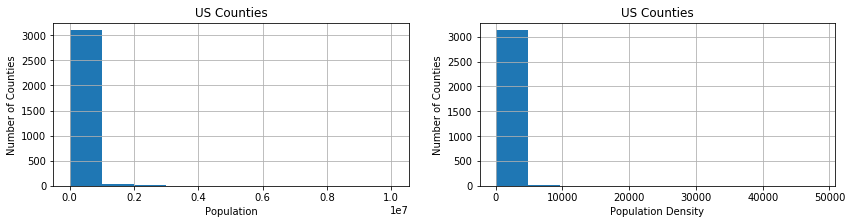

In [18]:

#min, max, mean, and std dev for population
pop_max = combined['pop_estimate_2019'].max()
pop_min = combined['pop_estimate_2019'].min()
pop_mean = combined['pop_estimate_2019'].mean()
pop_std = combined['pop_estimate_2019'].std()

#print stats for population
print("Population:\n")
print("Min: " + str(pop_min))
print("Max: " + str(pop_max))
print("Mean: " + str(pop_mean))
print("Std Dev: " + str(pop_std) + "\n")

#min, max, mean, and std dev for first_date deaths
pop_den_max = combined['pop_density'].max()
pop_den_min = combined['pop_density'].min()
pop_den_mean = combined['pop_density'].mean()
pop_den_std = combined['pop_density'].std()

#print stats for population density
print("Population Density:\n")
print("Min: " + str(pop_den_min))
print("Max: " + str(pop_den_max))
print("Mean: " + str(pop_den_mean))
print("Std Dev: " + str(pop_den_std) + "\n")

#plot stats for first_date
pop_hist = plt.figure(figsize=(14,3))

pop_ax = pop_hist.add_subplot(121)
pop_den_ax = pop_hist.add_subplot(122)

pop_ax.set_title("US Counties")
pop_ax.set_xlabel("Population")
pop_ax.set_ylabel("Number of Counties")

pop_den_ax.set_title("US Counties")
pop_den_ax.set_xlabel("Population Density")
pop_den_ax.set_ylabel("Number of Counties")

combined["pop_estimate_2019"].hist(bins=10, ax=pop_ax)
combined["pop_density"].hist(bins=10, ax=pop_den_ax)
plt.show()



### 13.4 - Data Prep for ML 
Drop irrelevant columns to prepare data for machine learning model

In [19]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from xgboost import XGBRegressor
import xgboost as xgb
from matplotlib import pyplot
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np 
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from xgboost import plot_importance


### testing to see if we can predict number of deaths instead, being given pop_density and number of cases

# drop_cols = ["date", "deaths", "county", "state", "fips", "land_area", "first_case_date"]
drop_cols = ["date", "county", "state", "fips", "land_area", "first_case_date", "cases"]

prepped_data=temp.drop(columns=drop_cols, axis=1)

# A resource?
# https://www.datastuff.tech/machine-learning/xgboost-predicting-life-expectancy-with-supervised-learning/

# WHAT I USED FOR THE CODE BELOW:
# https://www.datatechnotes.com/2019/06/regression-example-with-xgbregressor-in.html

#taking a subset of the data just to see how the algorithm works without waiting forever
small_data = prepped_data.sample(frac=1, random_state=19)
display(small_data)

# Our y value is 'cases'
# Y = small_data['cases'] 
Y = small_data['case_death_rate'] 

#and remove y column from the dataset
# small_data.drop(labels='cases', axis=1, inplace=True)
small_data.drop(labels='case_death_rate', axis=1, inplace=True)

X = small_data

X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.15)
print(len(X_train), len(y_train), len(X_test), len(y_test))


# # first split data into train and test datasets
# X_train, X_test, y_train, y_test = train_test_split(prepped_data, Y, test_size=0.2, random_state=1)
# # then split the training data into train and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
# print(len(X_train), len(X_val), len(X_test))
# display(prepped_data.corr(method ='kendall'))

display(prepped_data.corrwith(Y, axis = 0) )


,deaths,pop_estimate_2019,pop_density,days_since_first_case,case_death_rate
56380,2,16545,22.840853,45,0.071429
124422,3,17549,22.134073,59,0.100000
161420,0,8635,22.526870,15,0.000000
78935,2,15670,20.416406,16,0.066667
6671,7,411406,303.141901,55,0.015766
...,...,...,...,...,...
39220,0,259547,388.892718,2,0.000000
164883,0,16231,28.505444,10,0.000000
99682,1,119679,199.767981,55,0.008621
82677,1,176862,256.921222,14,0.020000


178732 178732 31542 31542


deaths                   0.071187
pop_estimate_2019        0.005431
pop_density              0.008491
days_since_first_case    0.110952
case_death_rate          1.000000
dtype: float64

### 13.5 Predicting case death rate for a county
Based on number of deaths, population density, population size, and days since first case

In [ ]:
xgbr = XGBRegressor(silent=True, objective='reg:logistic')

# fit the model with the training data
xgbr.fit(X_train, y_train)
plot_importance(xgbr)
pyplot.show()

scores = cross_val_score(xgbr, X_train,y_train,cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

# Cross-validation with a k-fold method can be checked as a following.
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

# Next, we can predict test data and check its accuracy. Here, we'll use MSE and RMSE as accuracy metrics.,
y_pred = xgbr.predict(X_test)

# .sort_values(by=['pop_density', 'days_since_first_case'])

mse = mean_squared_error(y_test,y_pred)
print("MSE: %.3f" % mse)
print("RMSE: %.3f" % np.sqrt(mse))

# predictions = [round(value) for value in y_pred]
# evaluate predictions
# accuracy = accuracy_score(y_test, y_pred.round(), normalize=False)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))



,Actual,Predicted
99247,0.000000,0.000046
112811,0.000000,0.000046
168352,0.000000,0.000057
116951,0.000000,0.000052
14,0.000000,0.000045
...,...,...
141450,0.192308,0.066718
93933,0.192308,0.079026
94148,0.196970,0.095824
96186,0.197802,0.067896


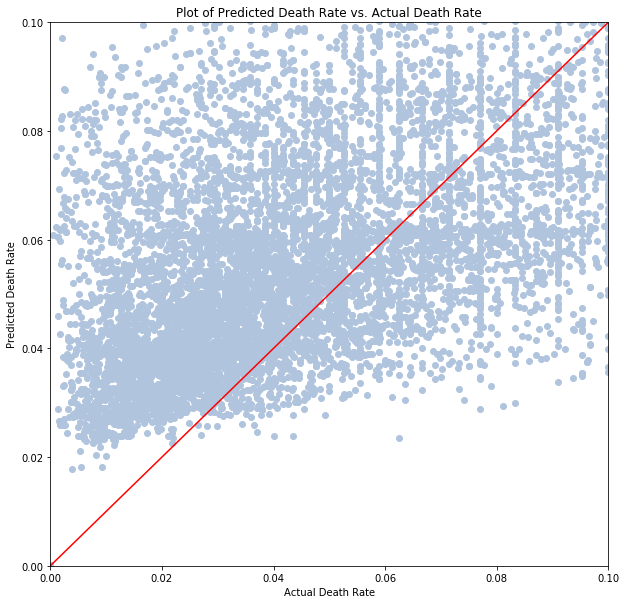

In [38]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
actual_v_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
actual_v_predicted=actual_v_predicted[actual_v_predicted['Actual']<0.2]
display(actual_v_predicted.sort_values(by=['Actual']))

# y_test_plot=y_test.copy()
# y_pred_plot = y_pred.copy()
# y_test_plot=y_test_plot[y_test_plot<0.2]
# display(y_test_plot)

fig, ax = plt.subplots(figsize=(10,10))
# ax.scatter(actual_v_predicted['Predicted'], actual_v_predicted['Actual'], color='lightsteelblue')
ax.scatter(actual_v_predicted['Actual'], actual_v_predicted['Predicted'], color='lightsteelblue')
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.title("Plot of Predicted Death Rate vs. Actual Death Rate")
plt.xlabel("Actual Death Rate")
plt.ylabel("Predicted Death Rate")
plt.xlim(0.0, 0.1)
plt.ylim(0.0, 0.1)
plt.show()


### Observing chart of results of 13.5

In [49]:
predicted_df=X_test.copy()
predicted_df['predicted_rate']=y_pred*100
predicted_df['actual_rate']=y_test*100
predicted_df['difference']=(predicted_df['predicted_rate']-predicted_df['actual_rate'])
display(predicted_df.sort_values(by=['difference'], ascending=False))

#display(predicted_df[(predicted_df['difference'] < 1.0) & (predicted_df['difference'] > -1.0)])

,deaths,pop_estimate_2019,pop_density,days_since_first_case,predicted_rate,actual_rate,difference
44139,1,89221,79.925647,1,69.228935,14.285714,54.943221
109999,1,5712,8.873561,2,70.674240,20.000000,50.674240
67983,1,3038,8.700135,0,76.090034,33.333333,42.756701
130114,1,9836,10.712963,1,62.498539,20.000000,42.498539
130115,1,9836,10.712963,2,56.546558,20.000000,36.546558
...,...,...,...,...,...,...,...
82852,2,12426,24.063208,34,10.269968,100.000000,-89.730032
114138,1,65084,21.970766,27,8.132731,100.000000,-91.867269
114142,1,65084,21.970766,31,7.825379,100.000000,-92.174621
114143,1,65084,21.970766,32,7.825379,100.000000,-92.174621


### 13.6 - Simple Linear Regression 
Predicting number of deaths based on number of cases

cases                    1.000000
deaths                   0.931342
pop_estimate_2019        0.372711
pop_density              0.328684
days_since_first_case    0.249327
dtype: float64

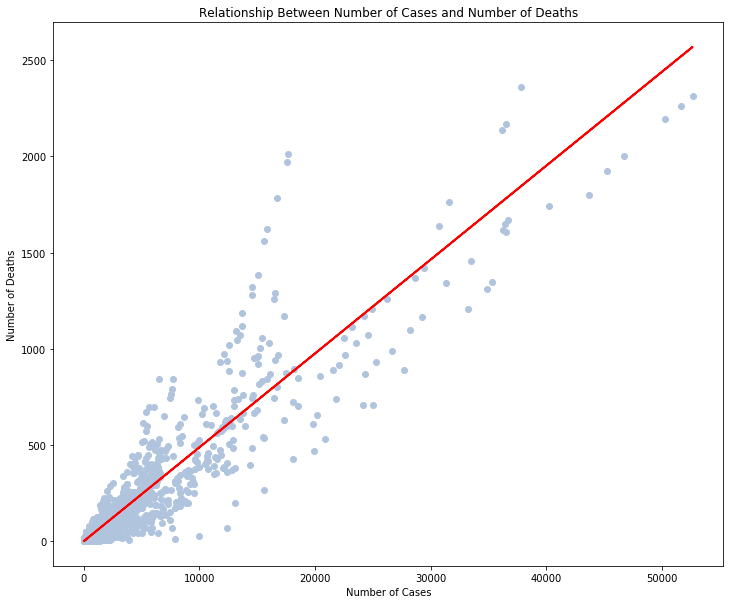

Mean Squared Error: 604.1430069529661
Root Mean Squared Error: 24.579320717891413


In [50]:
drop_cols = ["date", "county", "state", "fips", "land_area", "first_case_date","case_death_rate"]

k_prepped_data=temp.drop(columns=drop_cols, axis=1)
newY = k_prepped_data['cases']
display(k_prepped_data.corrwith(newY, axis = 0) )

#Using this tutorial: https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

kX = k_prepped_data['cases'].values.reshape(-1,1)
kY = k_prepped_data['deaths'].values.reshape(-1,1)

kX_train, kX_test, kY_train, kY_test = train_test_split(kX, kY, test_size=0.3, random_state=0)

#train model
regressor = LinearRegression()
regressor.fit(kX_train, kY_train)

y_pred = regressor.predict(kX_test)
actual_v_predicted = pd.DataFrame({'Actual': kY_test.flatten(), 'Predicted': y_pred.flatten()})

plt.figure(figsize=(12,10))

plt.scatter(kX_test, kY_test,  color='lightsteelblue')
plt.plot(kX_test, y_pred, color='red', linewidth=2)
plt.title('Relationship Between Number of Cases and Number of Deaths')
plt.xlabel('Number of Cases')
plt.ylabel('Number of Deaths')
 
plt.show()



print('Mean Squared Error:', mean_squared_error(kY_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(kY_test, y_pred)))

### 13.7 - Multiple Regression 
Predicting number of deaths based on number of cases, population density, days since first case, and population size. This is only negligibly better than the linear regression above. 

In [51]:
from mpl_toolkits.mplot3d import Axes3D

drop_cols = ["date", "county", "state", "fips", "land_area", "first_case_date"]

k_prepped_data=temp.drop(columns=drop_cols, axis=1)

kX = k_prepped_data[['cases','pop_density','days_since_first_case','pop_estimate_2019']].values
kY = k_prepped_data['deaths'].values


kX_train, kX_test, kY_train, kY_test = train_test_split(kX, kY, test_size=0.3, random_state=0)

#train model
regressor = LinearRegression()
regressor.fit(kX_train, kY_train)

y_pred = regressor.predict(kX_test)

actual_v_predicted = pd.DataFrame({'Actual': kY_test.flatten(), 'Predicted': y_pred.flatten()})

display(actual_v_predicted)

print('Mean Squared Error:', mean_squared_error(kY_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(kY_test, y_pred)))


,Actual,Predicted
0,20,8.546376
1,0,0.841228
2,0,-0.839246
3,0,-0.240911
4,0,0.115343
...,...,...
39328,2,0.972745
39329,0,0.552322
39330,3,-2.532425
39331,0,0.390229


Mean Squared Error: 599.494227464605
Root Mean Squared Error: 24.48457121259437


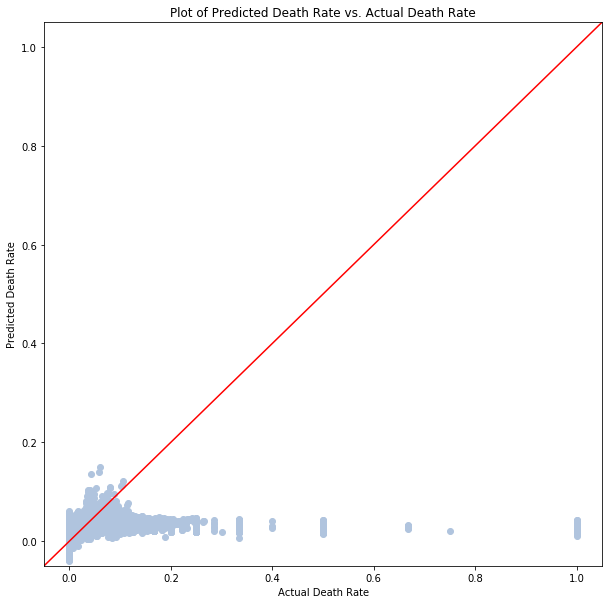

Mean Squared Error: 0.006526112262890651
Root Mean Squared Error: 0.08078435654810064


In [52]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

#plot actual v predicted and x = y line
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(y_test, y_pred, color='lightsteelblue')
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.xlabel("sdj")
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.title("Plot of Predicted Death Rate vs. Actual Death Rate")
plt.xlabel("Actual Death Rate")
plt.ylabel("Predicted Death Rate")
plt.show()

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

### 13.8 - Support Vector Regression
We also tried Support Vector Regression (SVR) to predict the number of deaths based on number of cases, population density, days since first case, and population size. Depending on the parameters, SVR takes significantly longer to train, but the prediction is worse than the linear regression above.

In [53]:
from sklearn.svm import SVR
    
svRegressor = SVR(C=1, epsilon=.2)
print("start training")
svRegressor.fit(X_train, y_train)
print("done training, start prediction")
svr_y_pred = svRegressor.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, svr_y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, svr_y_pred)))

start training
done training, start prediction
Mean Squared Error: 0.03363332564925751
Root Mean Squared Error: 0.18339390843007167


,Actual,Predicted
11647,0.000000,0.020579
22344,0.013975,0.017677
52184,0.000000,0.039584
83839,0.250000,0.021975
34193,0.015625,0.035624
...,...,...
8925,0.000000,0.020543
109952,0.000000,0.037010
54637,0.000000,0.042586
86793,0.000000,0.023858


,deaths,pop_estimate_2019,pop_density,days_since_first_case,predicted_rate,actual_rate,difference
92545,0,50990,66.620502,0,53.888073,0.000000,53.888073
46690,0,9494,12.838404,1,52.715858,0.000000,52.715858
128905,1,9776,19.135609,5,67.648913,16.666667,50.982247
15807,0,305285,808.894836,5,45.865483,0.000000,45.865483
40803,1,21096,81.827703,4,58.150470,12.500000,45.650470
...,...,...,...,...,...,...,...
2944,1,77200,25.786023,9,51.859737,100.000000,-48.140263
125335,1,36664,40.545412,4,50.879369,100.000000,-49.120631
38838,1,6061,7.572653,0,37.815538,100.000000,-62.184462
127007,1,23424,55.289619,3,26.190322,100.000000,-73.809678


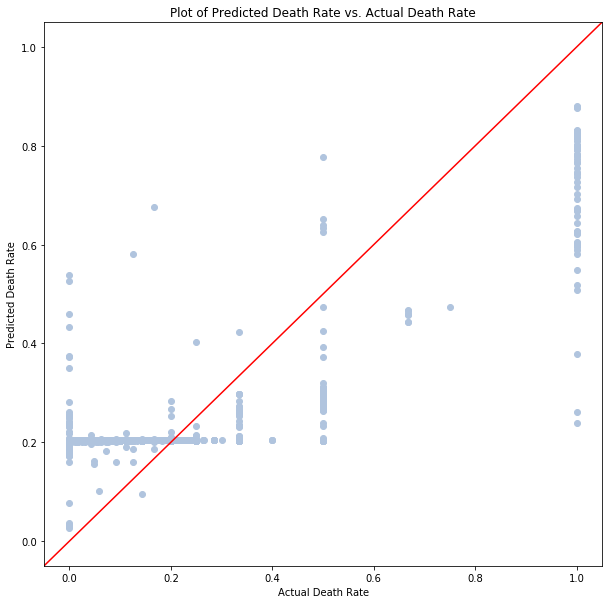

In [54]:
actual_v_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
display(actual_v_predicted)
predicted_df=X_test.copy()
predicted_df['predicted_rate']=svr_y_pred*100
predicted_df['actual_rate']=y_test*100
predicted_df['difference']=(predicted_df['predicted_rate']-predicted_df['actual_rate'])
display(predicted_df.sort_values(by=['difference'], ascending=False))

#plot actual v predicted and x = y line
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(y_test, svr_y_pred, color='lightsteelblue')
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.xlabel("sdj")
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.title("Plot of Predicted Death Rate vs. Actual Death Rate")
plt.xlabel("Actual Death Rate")
plt.ylabel("Predicted Death Rate")
plt.show()

